<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [6]:
!pip install wget
import wget

In [9]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [11]:
wget.download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite')

100% [........................................................................] 36679680 / 36679680

'm4_survey_data.sqlite'

Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

## Demo: How to run an sql query


In [7]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [8]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [9]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [20]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


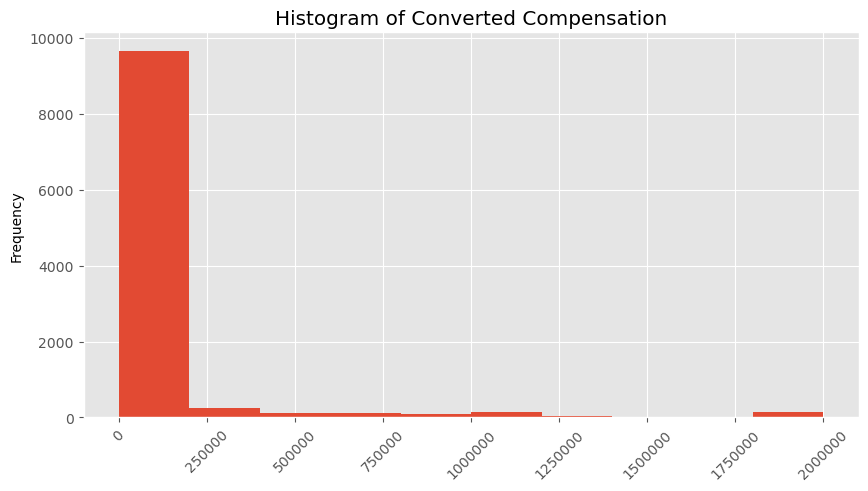

In [42]:
# your code goes here
query = "SELECT ConvertedComp FROM master"
df=pd.read_sql_query(query,conn)
df.plot(kind="hist",title="Histogram of Converted Compensation", legend=False, rot=45, figsize=(10,5))
df.sort_values(by="ConvertedComp",ascending=False).head(25)
plt.ticklabel_format(style='plain')

### Box Plots


*-Plot a box plot of `Age.`


<Axes: title={'center': 'Age Box Plot'}>

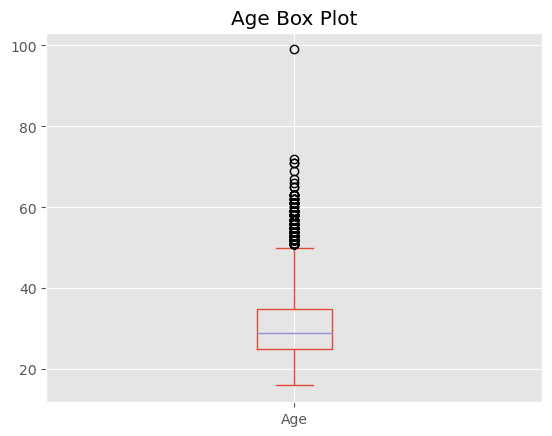

In [25]:
# your code goes here
query = "SELECT Age FROM master"
pd.read_sql_query(query,conn).plot(kind="box", title="Age Box Plot")


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


<Axes: title={'center': 'Age vs Work Week Hours'}, xlabel='Age', ylabel='WorkWeekHrs'>

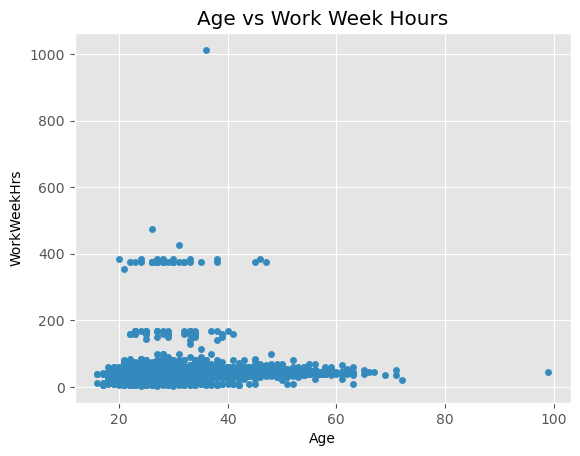

In [23]:
# your code goes here
query = "SELECT Age,WorkWeekHrs FROM master"
pd.read_sql_query(query,conn).plot(kind="scatter", x="Age",y="WorkWeekHrs", title="Age vs Work Week Hours")

<Axes: title={'center': 'Age vs Converted Compensation'}, xlabel='Age', ylabel='ConvertedComp'>

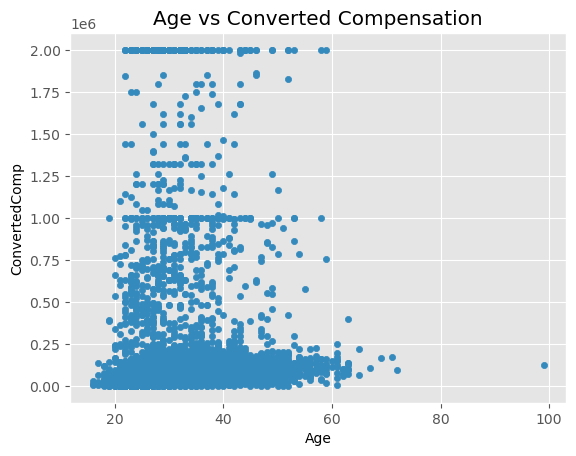

In [49]:
# your code goes here
query = "SELECT Age,ConvertedComp FROM master"
pd.read_sql_query(query,conn).plot(kind="scatter", x="Age",y="ConvertedComp", title="Age vs Converted Compensation")

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


<Axes: xlabel='WorkWeekHrs', ylabel='CodeRevHrs'>

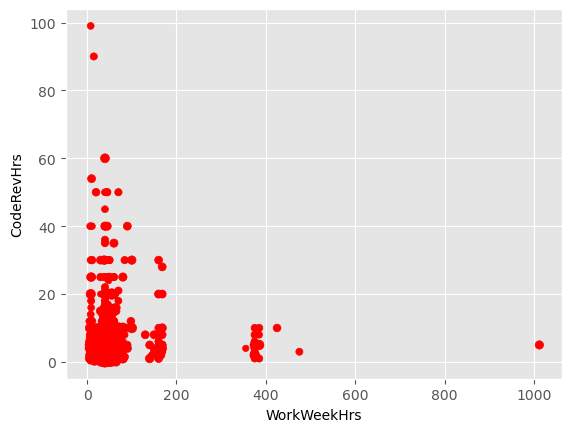

In [43]:
# your code goes here
query = "SELECT WorkWeekHrs, CodeRevHrs, Age FROM master"
pd.read_sql_query(query,conn).plot(kind="scatter", x="WorkWeekHrs", y="CodeRevHrs", s="Age", c="red")


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


<Axes: title={'center': 'Top 5 Databases that Respondents Wish to Learn Next Year'}>

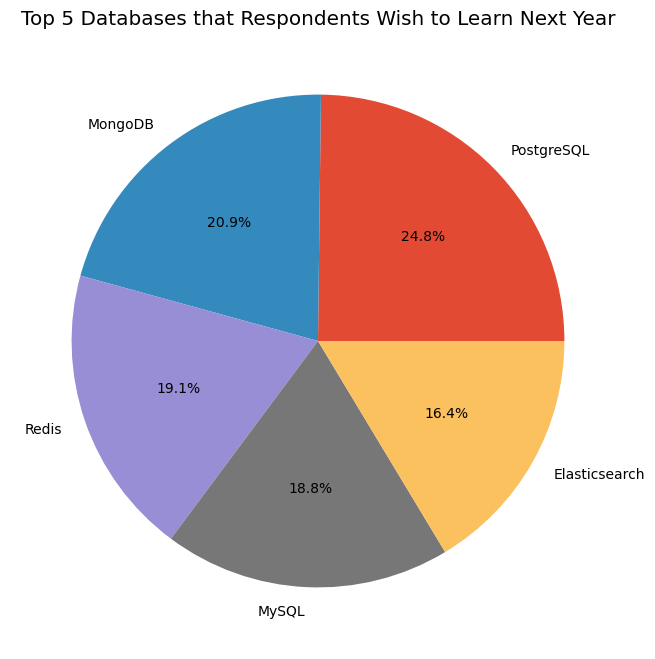

In [50]:
# your code goes here
query = "SELECT DatabaseDesireNextYear, COUNT(*) AS Count FROM DatabaseDesireNextYear GROUP BY DatabaseDesireNextYear ORDER BY Count DESC LIMIT 5"
pd.read_sql_query(query,conn,index_col="DatabaseDesireNextYear").plot(kind="pie", y="Count",figsize=(8,8),autopct='%1.1f%%',legend=False,
                                                                      title="Top 5 Databases that Respondents Wish to Learn Next Year",ylabel="")

<Axes: title={'center': 'Top 5 Languages that Respondents Wish to Learn Next Year'}>

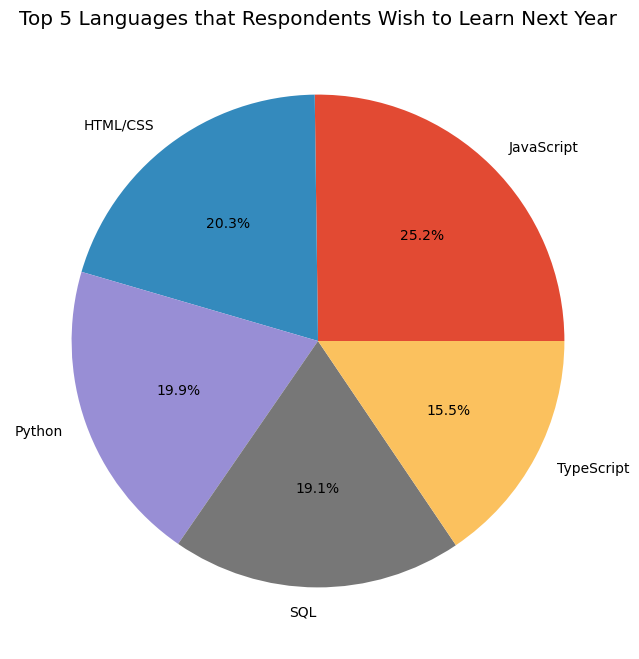

In [51]:
# your code goes here
query = "SELECT LanguageDesireNextYear, COUNT(*) AS Count FROM LanguageDesireNextYear GROUP BY LanguageDesireNextYear ORDER BY Count DESC LIMIT 5"
pd.read_sql_query(query,conn,index_col="LanguageDesireNextYear").plot(kind="pie", y="Count",figsize=(8,8),autopct='%1.1f%%',legend=False,
                                                                      title="Top 5 Languages that Respondents Wish to Learn Next Year", ylabel="")

,Count
LanguageWorkedWith,
JavaScript,8687
HTML/CSS,7830
SQL,7106
Bash/Shell/PowerShell,4642
Python,4542


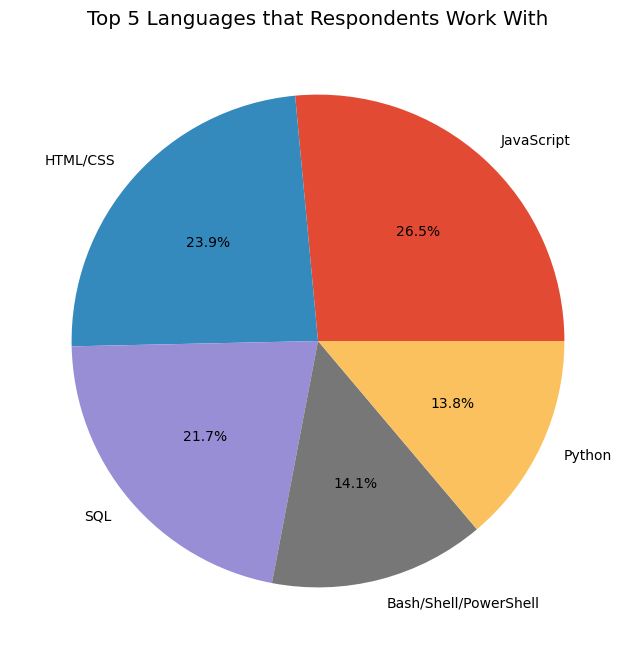

In [54]:
# your code goes here
query = "SELECT LanguageWorkedWith, COUNT(*) AS Count FROM LanguageWorkedWith GROUP BY LanguageWorkedWith ORDER BY Count DESC LIMIT 5"
pd.read_sql_query(query,conn,index_col="LanguageWorkedWith").plot(kind="pie", y="Count",figsize=(8,8),legend=False,
                                                                  title="Top 5 Languages that Respondents Work With", ylabel="",autopct='%1.1f%%')
pd.read_sql_query(query,conn,index_col="LanguageWorkedWith")

,Count
DatabaseWorkedWith,
MySQL,5469
Microsoft SQL Server,4110
PostgreSQL,4097
SQLite,3248
MongoDB,3016


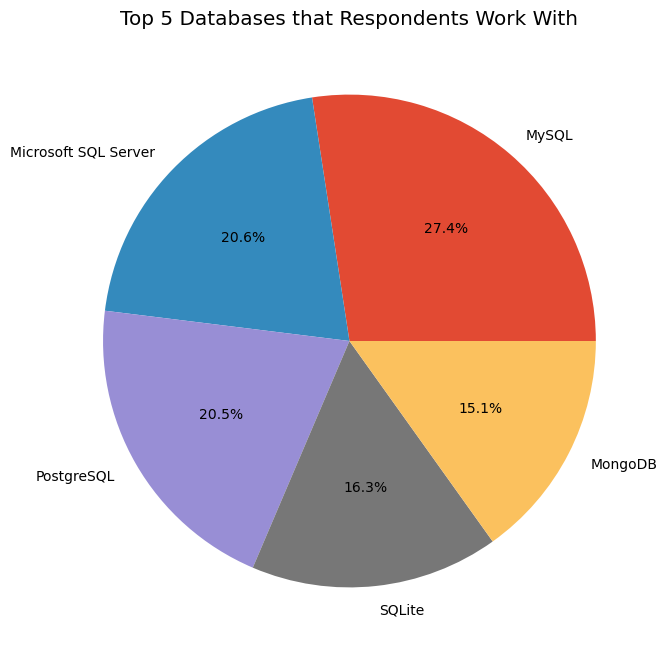

In [56]:
# your code goes here
query = "SELECT DatabaseWorkedWith, COUNT(*) AS Count FROM DatabaseWorkedWith GROUP BY DatabaseWorkedWith ORDER BY Count DESC LIMIT 5"
pd.read_sql_query(query,conn,index_col="DatabaseWorkedWith").plot(kind="pie", y="Count",figsize=(8,8),legend=False,
                                                                  title="Top 5 Databases that Respondents Work With", ylabel="",autopct='%1.1f%%')
pd.read_sql_query(query,conn,index_col="DatabaseWorkedWith")

In [201]:
# your code goes here

query = "SELECT * FROM DatabaseWorkedWith"
df = pd.read_sql_query(query,conn,index_col="DatabaseWorkedWith").reset_index()
df

,DatabaseWorkedWith,Respondent
0,MySQL,4
1,SQLite,4
2,DynamoDB,9
3,PostgreSQL,9
4,SQLite,9
...,...,...
31370,MySQL,25137
31371,PostgreSQL,25138
31372,Microsoft SQL Server,25141
31373,Redis,25141


In [208]:
# your code goes here

query = "SELECT * FROM DatabaseWorkedWith"
df = pd.read_sql_query(query,conn,index_col="DatabaseWorkedWith").reset_index()
df_filter=df.groupby("Respondent").sum()
df_filter.loc[df_filter["DatabaseWorkedWith"]=="MySQL"]

,DatabaseWorkedWith
Respondent,
25,MySQL
129,MySQL
147,MySQL
148,MySQL
194,MySQL
...,...
25007,MySQL
25012,MySQL
25091,MySQL


In [247]:
# your code goes here

query = "SELECT * FROM DatabaseWorkedWith"
df = pd.read_sql_query(query,conn,index_col="DatabaseWorkedWith").reset_index()
df["NumberLanguage"]=1
df_filter=df.pivot_table(index="Respondent", columns="DatabaseWorkedWith",values="NumberLanguage")
df_filter1 = df_filter[df_filter["MySQL"]==1].sum(axis=1)

In [269]:
# your code goes here

query = """SELECT * FROM DatabaseWorkedWith WHERE DatabaseWorkedWith = 'MySQL' AND Respondent IN 
(SELECT Respondent FROM (SELECT Respondent, COUNT(*) AS count FROM DatabaseWorkedWith GROUP BY Respondent HAVING count = 1))"""
df = pd.read_sql_query(query,conn)
df

,Respondent,DatabaseWorkedWith
0,25,MySQL
1,129,MySQL
2,147,MySQL
3,148,MySQL
4,194,MySQL
...,...,...
469,25007,MySQL
470,25012,MySQL
471,25091,MySQL
472,25111,MySQL


In [103]:
query= "SELECT Respondent,DatabaseWorkedWith,COUNT(*) AS count FROM DatabaseWorkedWith GROUP BY Respondent HAVING count = 1"
df = pd.read_sql_query(query,conn)
one_db=df["count"].sum()

In [104]:
query= "SELECT Respondent,DatabaseWorkedWith,COUNT(*) AS count FROM DatabaseWorkedWith GROUP BY Respondent HAVING count > 1"
df = pd.read_sql_query(query,conn)
morethanonedb=df["count"].sum()

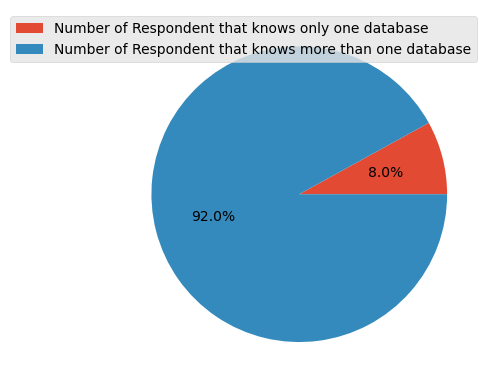

In [121]:
plt.pie([one_db,morethanonedb],autopct='%1.1f%%')
plt.legend(labels=["Number of Respondent that knows only one database","Number of Respondent that knows more than one database"])
plt.show()

In [122]:
query= "SELECT Respondent,LanguageWorkedWith,COUNT(*) AS count FROM LanguageWorkedWith GROUP BY Respondent HAVING count = 1"
df = pd.read_sql_query(query,conn)
one_lang=df["count"].sum()

In [123]:
query= "SELECT Respondent,LanguageWorkedWith,COUNT(*) AS count FROM LanguageWorkedWith GROUP BY Respondent HAVING count > 1"
df = pd.read_sql_query(query,conn)
morethanonelang=df["count"].sum()

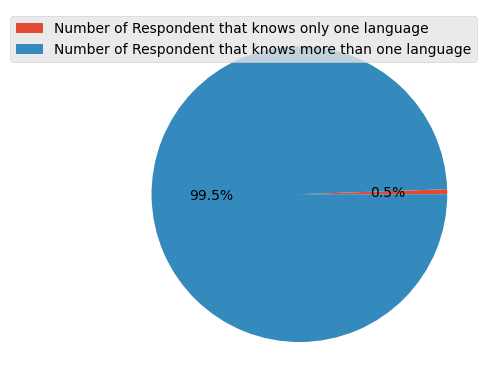

In [124]:
plt.pie([one_lang,morethanonelang],autopct='%1.1f%%')
plt.legend(labels=["Number of Respondent that knows only one language","Number of Respondent that knows more than one language"])
plt.show()

<Axes: title={'center': 'Top 10 Databases that Respondent Knows Only One of Them'}>

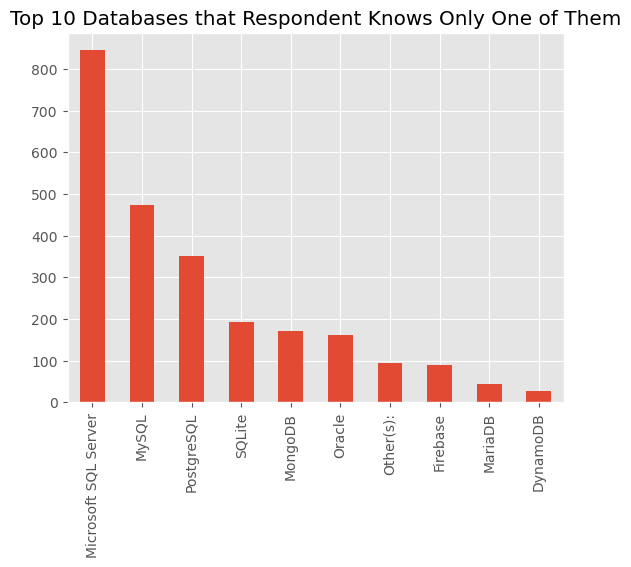

In [98]:
query= "SELECT Respondent,DatabaseWorkedWith,COUNT(*) AS count FROM DatabaseWorkedWith GROUP BY Respondent HAVING count = 1"
df = pd.read_sql_query(query,conn)
df["DatabaseWorkedWith"].value_counts().head(10).plot(kind="bar", title="Top 10 Databases that Respondent Knows Only One of Them")

<Axes: title={'center': 'Top 10 Databases that Respondent Knows More Than One of Them'}>

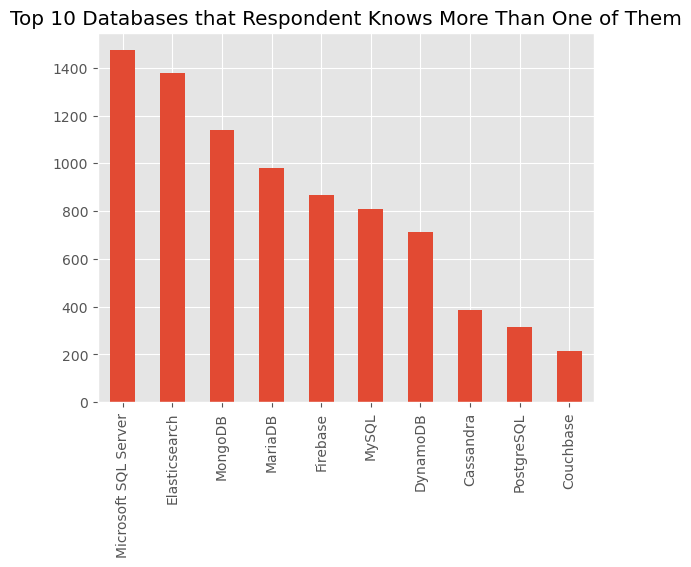

In [93]:
query= "SELECT Respondent,DatabaseWorkedWith,COUNT(*) AS count FROM DatabaseWorkedWith GROUP BY Respondent HAVING count > 1"
df = pd.read_sql_query(query,conn)
df["DatabaseWorkedWith"].value_counts().head(10).plot(kind="bar", title="Top 10 Databases that Respondent Knows More Than One of Them")

<Axes: title={'center': 'Top 10 Languages that Respondent Knows Only One of Them'}>

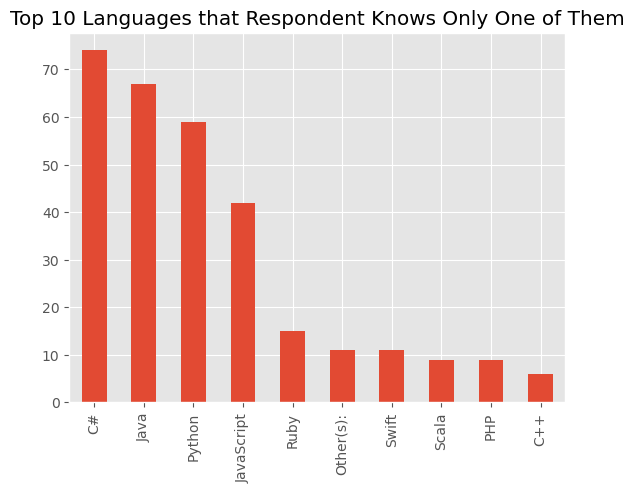

In [88]:
query= "SELECT Respondent,LanguageWorkedWith,COUNT(*) AS count FROM LanguageWorkedWith GROUP BY Respondent HAVING count = 1"
df = pd.read_sql_query(query,conn)
df["LanguageWorkedWith"].value_counts().head(10).plot(kind="bar", title="Top 10 Languages that Respondent Knows Only One of Them")

<Axes: title={'center': 'Top 10 Languages that Respondent Knows More Than One of Them'}>

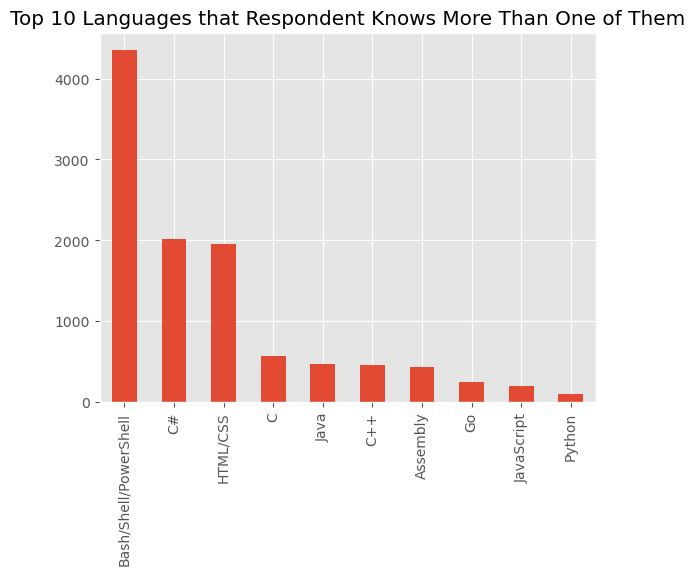

In [91]:
query= "SELECT Respondent,LanguageWorkedWith,COUNT(*) AS count FROM LanguageWorkedWith GROUP BY Respondent HAVING count > 1"
df = pd.read_sql_query(query,conn)
df["LanguageWorkedWith"].value_counts().head(10).plot(kind="bar", title="Top 10 Languages that Respondent Knows More Than One of Them")

In [64]:
# your code goes here

query = """SELECT * FROM DatabaseWorkedWith WHERE Respondent IN 
(SELECT Respondent FROM (SELECT Respondent, COUNT(*) AS count FROM DatabaseWorkedWith GROUP BY Respondent HAVING count = 1))"""
df = pd.read_sql_query(query,conn)
df

,Respondent,DatabaseWorkedWith
0,25,MySQL
1,38,Microsoft SQL Server
2,70,Microsoft SQL Server
3,74,DynamoDB
4,75,MongoDB
...,...,...
2510,25128,SQLite
2511,25136,Microsoft SQL Server
2512,25137,MySQL
2513,25138,PostgreSQL


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


<AxesSubplot:xlabel='Age'>

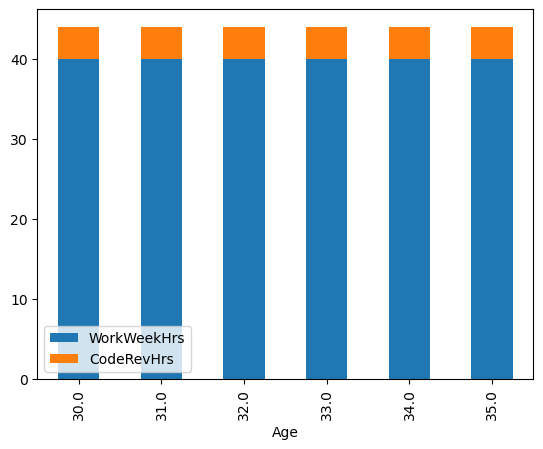

In [99]:
# your code goes here
query = "SELECT Age,WorkWeekHrs, CodeRevHrs FROM master WHERE Age BETWEEN 30 AND 35"
pd.read_sql_query(query, conn).groupby("Age").median().plot(kind="bar",stacked=True)

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


<Axes: title={'center': 'Median Converted Compensation for all ages between 45 and 60'}, xlabel='Age'>

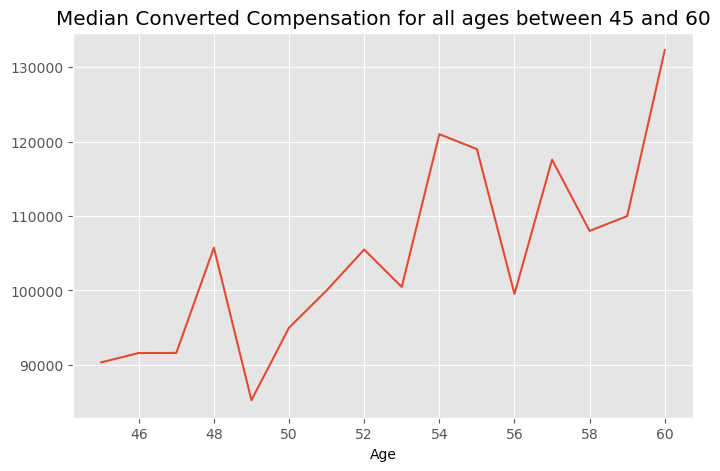

In [61]:
# your code goes here
query = "SELECT Age, ConvertedComp FROM master WHERE Age BETWEEN 45 AND 60"
pd.read_sql_query(query,conn).groupby("Age").median().plot(kind="line",
                                                           title="Median Converted Compensation for all ages between 45 and 60", figsize=(8,5), legend=None)


<Axes: title={'center': 'Median Converted Compensation for all ages between 25 and 30'}, xlabel='Age'>

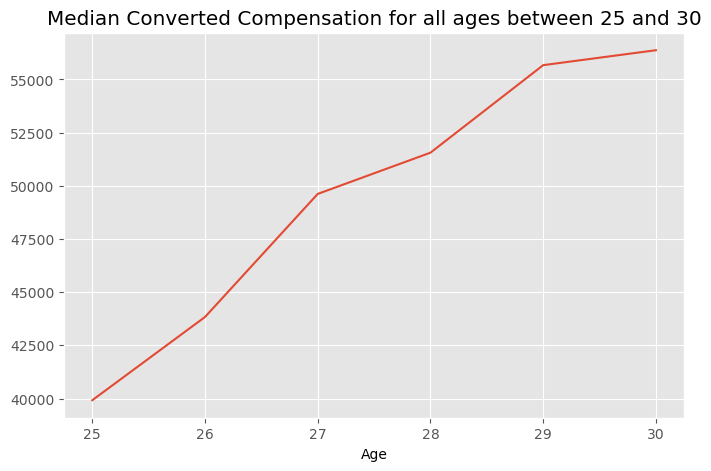

In [62]:
# your code goes here
query = "SELECT Age, ConvertedComp FROM master WHERE Age BETWEEN 25 AND 30"
pd.read_sql_query(query,conn).groupby("Age").median().plot(kind="line",
                                                           title="Median Converted Compensation for all ages between 25 and 30", figsize=(8,5), legend=None)


<Axes: title={'center': 'Median Converted Compensation for all ages between 25 and 35'}, xlabel='Age'>

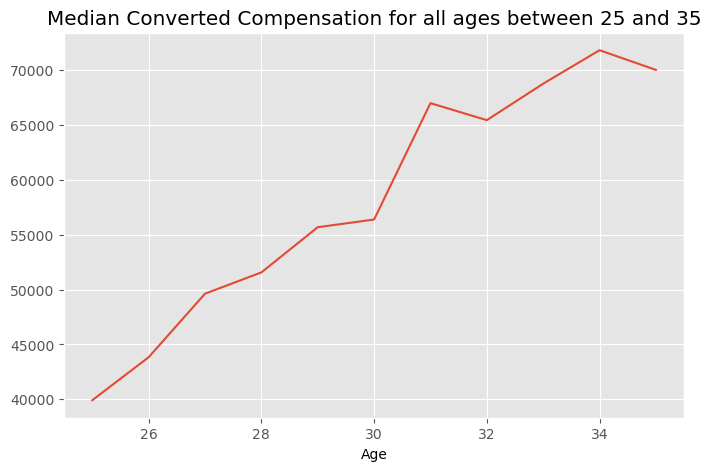

In [63]:
# your code goes here
query = "SELECT Age, ConvertedComp FROM master WHERE Age BETWEEN 25 AND 35"
pd.read_sql_query(query,conn).groupby("Age").median().plot(kind="line",
                                                           title="Median Converted Compensation for all ages between 25 and 35", figsize=(8,5), legend=None)


### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


<Axes: xlabel='MainBranch'>

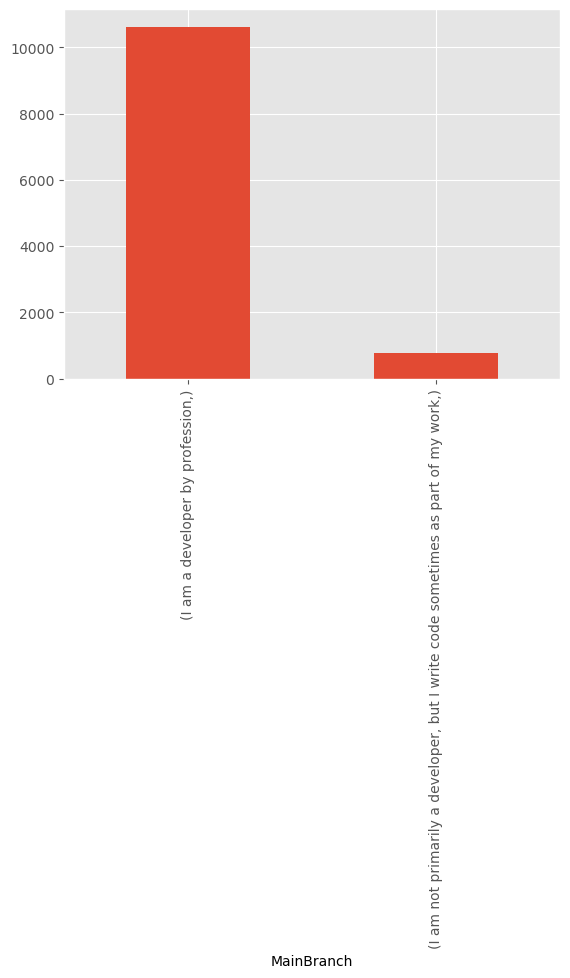

In [28]:
# your code goes here
query = "SELECT MainBranch FROM master"
pd.read_sql_query(query,conn).value_counts().plot(kind="bar")


Close the database connection.


In [239]:
query= "SELECT DevType, COUNT(*) AS count FROM DevType GROUP BY DevType ORDER BY count DESC"
pd.read_sql_query(query,conn)

,DevType,count
0,"Developer, full-stack",6928
1,"Developer, back-end",6290
2,"Developer, front-end",3920
3,"Developer, desktop or enterprise applications",2575
4,"Developer, mobile",1959
5,DevOps specialist,1639
6,Database administrator,1413
7,System administrator,1202
8,Designer,988
9,"Developer, QA or test",911


In [29]:
df

,ConvertedComp
0,61000.0
1,95179.0
2,90000.0
3,455352.0
4,65277.0
...,...
11393,130000.0
11394,19880.0
11395,105000.0
11396,80371.0


In [114]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
